In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape,test.shape)

(8523, 12) (5681, 11)


## Lets perform visualization on the training data

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Will divide categorical variable and numerical variable to perform some visualization so will get the better understanding of the data

In [5]:
cat_cols=train.select_dtypes(include='object')
cat_cols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [6]:
num_cols=train.select_dtypes(exclude='object')
num_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


## Will Perform the Uni-variate analysis

In [7]:
cat_cols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

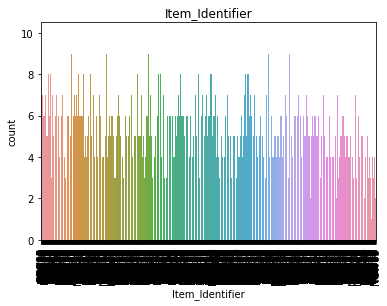

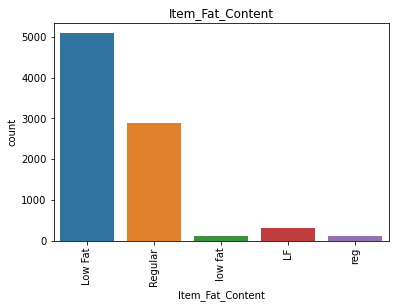

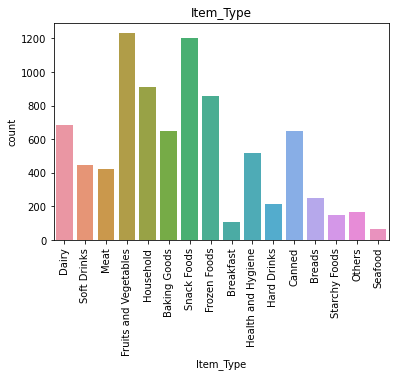

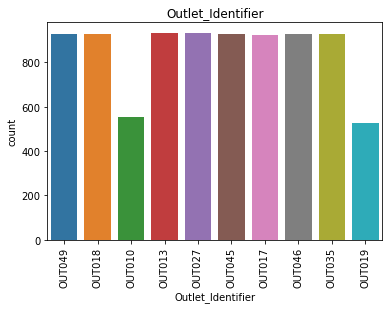

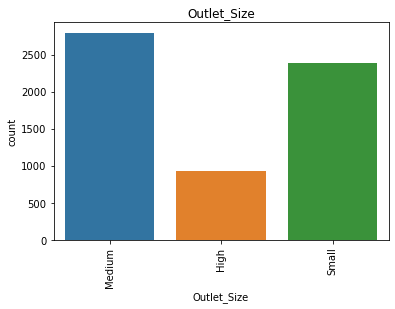

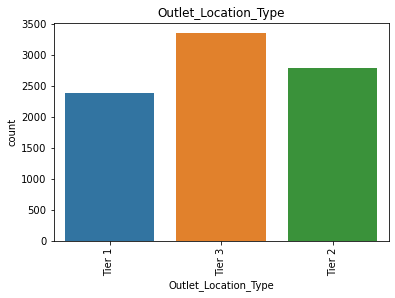

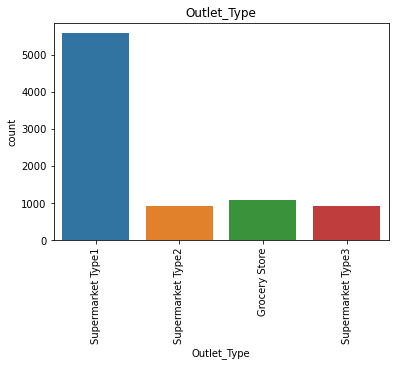

In [8]:
for i in cat_cols.columns:
    sns.countplot(train[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

### Getting the insights of each and every plot

1. By seeing the visualization of item_identifier we can say that it has different categories so we can convert this different in to 3 categories
2. By visualizing the Item_Fat_content we can say their is a typo error and we can rename it into Low Fat and Regular
3. By visualizing the Item Type Fruits and Vegetables are having the higest count and seafood are having low count
4. By visualizing the Outlet Identifier we can say that all are having equal number of count
5. By visualizing the Outlet Size we can say Medium has higest count and High has low count

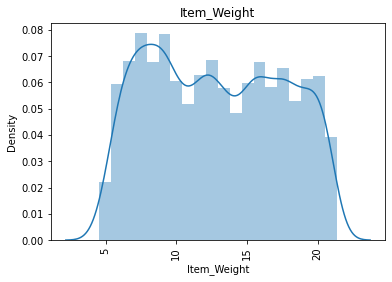

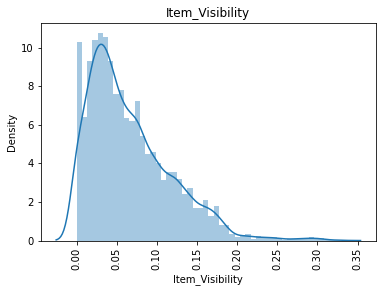

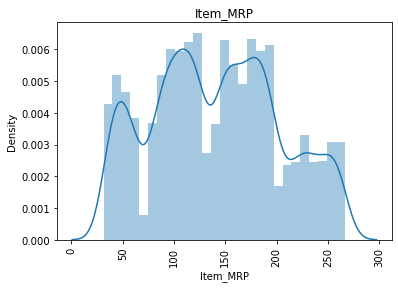

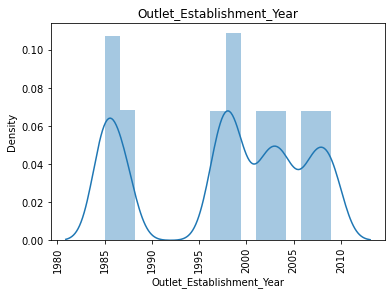

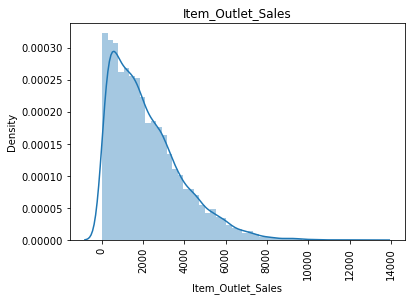

In [9]:
for i in num_cols.columns:
    sns.distplot(train[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

#### By visualizing Outlet Establishment year we can see that we want to convert it in to categorical variable

### Most of the data are Normaly distributed but the Item Outlet Sales are Right Skewed so before building the model we want to convert it in to normal distribution by performing log transformation or sqrt transformation


In [10]:
train.Outlet_Establishment_Year.value_counts()   # We have to consider Item Outlet Sales as categorical variable 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

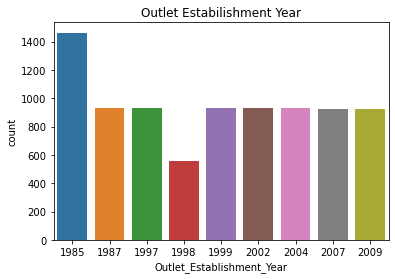

In [11]:
sns.countplot(train.Outlet_Establishment_Year)
plt.title('Outlet Estabilishment Year')
plt.show()

In [12]:
cat_cols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
new_catcols=pd.concat([cat_cols,train.Outlet_Establishment_Year],axis=1)
new_catcols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1999
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,2009
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1999
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,1998
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1987
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,1987
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1,2002
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,2004
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,2009


In [14]:
new_numcols=num_cols.drop('Outlet_Establishment_Year',axis=1)
new_numcols

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


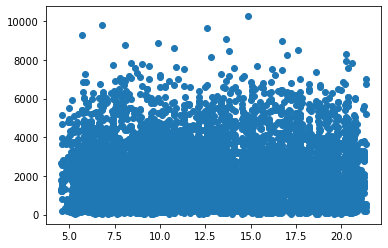

In [15]:
### All the independent variable with the target variable should be ploted and fetching the information

plt.scatter(train.Item_Weight,train.Item_Outlet_Sales)
plt.show()

In [16]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Establishment_Year'>

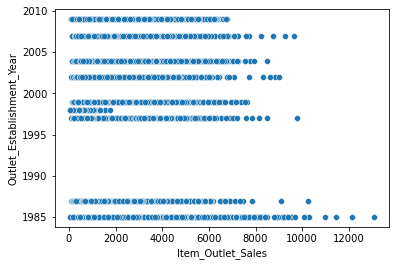

In [17]:
sns.scatterplot(train.Item_Outlet_Sales,train.Outlet_Establishment_Year)

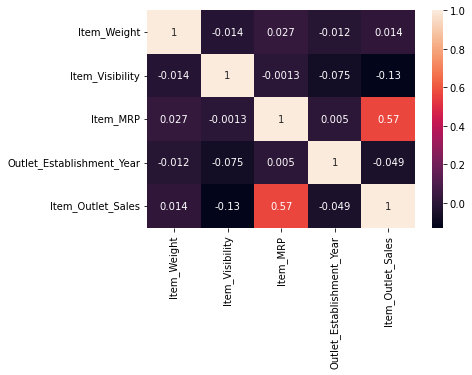

In [18]:
sns.heatmap(train.corr(),annot=True)
plt.show()

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [21]:
df=pd.concat([train,test],axis=0)

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df.shape

(14204, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The data preprocessing steps to be done 

1. Item_Visibility should not be having 0 as its minimum 
2. In Item_Identifier we can take only starting 2 char and will use for prediction
3. In Item_Fat_Content we have only 2 levels but due to typoerror we have 5 levels
4. will convert Outlet_Establishment_Year to the age of the store establishment


## Will check for missing values

In [26]:
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

Item_Outlet_Sales has no missing values where in test data we dont have the target variable so we are getting the null counts here so we should not treat the target variable [Item_Outlet_Sales]

In [27]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


will treat the missing values 

will fill the Item_Weight based on the mean by grouping with the Item_Identifier so that the treatement of missing values will be more efficient


In [28]:
grouped_Item_Weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
grouped_Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [29]:
# now will find the missing data in the Item_Weight column

miss_idx=df[df['Item_Weight'].isnull()].index
miss_idx

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            5627, 5634, 5640, 5643, 5648, 5655, 5656, 5661, 5665, 5669],
           dtype='int64', length=2439)

In [30]:
for i,item in enumerate(df.Item_Identifier):
    if i in miss_idx:
        if item in grouped_Item_Weight.index:
            df['Item_Weight'][i]=grouped_Item_Weight.loc[item]['Item_Weight']


In [31]:
df['Item_Weight'].isnull().sum()

0

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
# now will impute the missing values which are present in the Outlet_Size by taking the mode because its a categorical variable

grouped_Outlet_Size=df.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
grouped_Outlet_Size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [34]:
miss_idx_Outlet_Size=df[df['Outlet_Size'].isnull()].index
miss_idx_Outlet_Size

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            5647, 5649, 5650, 5652, 5662, 5668, 5670, 5678, 5679, 5680],
           dtype='int64', length=4016)

In [35]:
for i,item in enumerate(df.Outlet_Type):
    if i in miss_idx_Outlet_Size:
        if item in grouped_Outlet_Size.index:
            df['Outlet_Size'][i]=grouped_Outlet_Size.loc[item]['Outlet_Size']

In [36]:
df['Outlet_Size'].isnull().sum()

0

In [37]:
df1=df.copy(deep=True)

In [38]:
df=df1.copy(deep=True)

In [39]:
df=df.reset_index()

In [40]:
# Now we are going to impute the 0 values in Item_Visibility with the mean of it 

mean_Item_Visibility=round(df['Item_Visibility'].mean(),6)
mean_Item_Visibility

0.065953

In [41]:
idx=df[df['Item_Visibility']==0].index
idx

Int64Index([    3,     4,     5,    10,    32,    33,    46,    60,    72,
               79,
            ...
            14120, 14126, 14134, 14137, 14158, 14166, 14171, 14177, 14184,
            14202],
           dtype='int64', length=879)

In [42]:
df.shape

(14204, 13)

In [43]:
df.iloc[idx,:]=df[df['Item_Visibility']==0].replace({0:mean_Item_Visibility})

In [44]:
df[df['Item_Visibility']==0]

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [45]:
# now will take only 2 char from the Item_Identifier

df.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


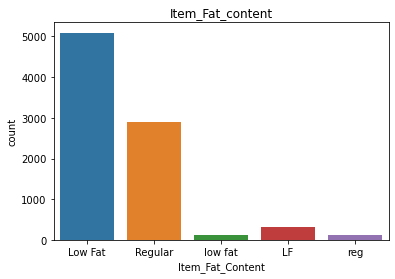

In [46]:
sns.countplot(cat_cols['Item_Fat_Content'])
plt.title('Item_Fat_content')
plt.show()

In [47]:
# will work on the typo error in the Item_Fat_Content

df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [48]:
# Now will replace the data accourdingly

df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [49]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [50]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x : x[0:2])

In [51]:
df['New_Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Identifier, dtype: int64

In [52]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [53]:
# Now will replace the data where ever we having the NC in the New_Item_Identifier the Item_Fat_Content should be outers

df.loc[df['New_Item_Identifier']=='NC','Item_Fat_Content']='others'

In [54]:
df['Item_Fat_Content'].value_counts()

Low Fat    6499
Regular    5019
others     2686
Name: Item_Fat_Content, dtype: int64

In [55]:
# We have collected the data from year 2013 so we are subtracting outlet Estiablishment year with 2013
df['age_of_store']=2013-df.Outlet_Establishment_Year

In [56]:
df.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,4,NCD19,8.93,others,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [57]:
df2=df.copy(deep=True)

In [58]:
df.drop(['index','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [59]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le=LabelEncoder()
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [62]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,4,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,14,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,10,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,6,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,9,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [63]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [64]:
new_df=pd.get_dummies(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Identifier'],data=df,drop_first=True)

In [65]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [66]:
train.shape

(8523, 12)

In [67]:
test.shape

(5681, 11)

In [68]:
# will split the data to train and test

result_test=new_df[new_df['Item_Outlet_Sales'].isnull()]
result_train=new_df[~new_df['Item_Outlet_Sales'].isnull()]

In [69]:
print(result_train.shape,result_test.shape)

(8523, 17) (5681, 17)


In [70]:
X=result_train.drop('Item_Outlet_Sales',axis=1)
y=result_train['Item_Outlet_Sales']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
model1=LinearRegression()
model1.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [75]:
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)

MSE_train = 1306659.0989638148
MSE_test = 1143526.6326155325
RMSE_train = 1143.091903113575
RMSE_test = 1069.3580469681483


In [76]:
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

r2_score_train = 0.5582701459538081
r2_score_test = 0.5792718077874299


In [77]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

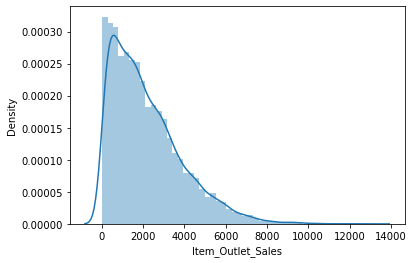

In [78]:
sns.distplot(new_df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

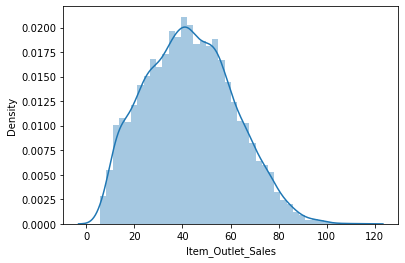

In [79]:
sns.distplot(new_df.Item_Outlet_Sales**(1/2))     # square root transformation 

In [80]:
y=result_train.Item_Outlet_Sales**(1/2)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [82]:
model2=LinearRegression()
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 113.47750250754535
MSE_test = 122.49879322988718
RMSE_train = 10.65258196436645
RMSE_test = 11.067917294138368
r2_score_train = 0.657727455354724
r2_score_test = 0.6497831666281407


In [83]:
from sklearn.ensemble import RandomForestRegressor

model3=RandomForestRegressor()
model3.fit(X_train,y_train)
y_train_pred=model3.predict(X_train)
y_test_pred=model3.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 16.785828277098553
MSE_test = 129.27886864786578
RMSE_train = 4.097051168474535
RMSE_test = 11.370086571696179
r2_score_train = 0.9493703330490629
r2_score_test = 0.630399330426173


In [84]:
model4=RandomForestRegressor(criterion='squared_error',max_depth=8,max_features='auto',n_estimators=500)


model4.fit(X_train,y_train)
y_train_pred=model4.predict(X_train)
y_test_pred=model4.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 85.91073760130381
MSE_test = 118.09683528640514
RMSE_train = 9.268804540031244
RMSE_test = 10.867236782476267
r2_score_train = 0.7408747450253792
r2_score_test = 0.6623681050667527


In [85]:
result_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [86]:
result_train.Item_Type.value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [88]:
mod_Item_Type=ols('Item_Outlet_Sales ~ Item_Type',data=result_train).fit()
anova_Item_Type=sm.stats.anova_lm(mod_Item_Type,type=2)
print(anova_Item_Type)

               df        sum_sq       mean_sq         F    PR(>F)
Item_Type     1.0  7.212469e+06  7.212469e+06  2.477119  0.115551
Residual   8521.0  2.481005e+10  2.911636e+06       NaN       NaN


In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [90]:
result_train.Item_Outlet_Sales.isnull().sum()

0

In [91]:
tukey_Item_Type=pairwise_tukeyhsd(result_train.Item_Outlet_Sales,result_train.Item_Type,alpha=0.05)
print(tukey_Item_Type)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1   251.161 0.8108  -183.0066  685.3286  False
     0      2  158.8374    0.9  -443.3791   761.054  False
     0      3  272.2237 0.2272   -52.0876   596.535  False
     0      4  279.5714 0.1733   -40.7958  599.9386  False
     0      5  179.8965 0.7817   -124.193  483.9861  False
     0      6  336.0384  0.005    52.6461  619.4307   True
     0      7  186.2504    0.9   -274.177  646.6778  False
     0      8   57.0291    0.9  -286.7934  400.8515  False
     0      9  305.8131 0.0407     5.6361  605.9901   True
     0     10  206.0067 0.8404   -158.512  570.5254  False
     0     11  -26.8315    0.9  -531.2397  477.5767  False
     0     12  373.0947    0.9  -392.0868 1138.2762  False
     0     13  324.3505 0.0093    39.6588  609.0422   True
     0     14   53.5405    0.9  -305.9972  413.0783  Fal

In [92]:
new_X=X.copy(deep=True)

In [93]:
new_X.drop('Item_Type',axis=1,inplace=True)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.2,random_state=42)

In [95]:
model5=RandomForestRegressor(criterion='squared_error',max_depth=8,max_features='auto',n_estimators=500)


model5.fit(X_train,y_train)
y_train_pred=model5.predict(X_train)
y_test_pred=model5.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

MSE_train = 91.80987307475047
MSE_test = 103.96582938087873
RMSE_train = 9.581746869686679
RMSE_test = 10.196363537108645
r2_score_train = 0.7290834488371662
r2_score_test = 0.6836447900945826


In [96]:
result_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [97]:
result_test.reset_index(drop=True,inplace=True)

In [98]:
new_X_train=result_train.drop(['Item_Outlet_Sales','Item_Type'],axis=1)
new_y_train=result_train['Item_Outlet_Sales']
new_X_test=result_test.drop(['Item_Outlet_Sales','Item_Type'],axis=1)

In [99]:
result_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,20.750,0.007565,13,107.8622,NaN,14,0,0,1,0,0,0,1,0,0,1,0
1,8.300,0.038428,4,87.3198,NaN,6,1,0,1,0,1,0,1,0,0,1,0
2,14.600,0.099575,11,241.7538,NaN,15,0,1,0,1,0,1,0,0,0,0,1
3,7.315,0.015388,13,155.0340,NaN,6,0,0,0,1,1,0,1,0,0,1,0
4,8.930,0.118599,4,234.2300,NaN,28,1,0,1,0,0,1,0,0,1,1,0


In [100]:
new_X_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age_of_store',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_others',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Identifier_FD',
       'New_Item_Identifier_NC'],
      dtype='object')

In [101]:
result_test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Item_Outlet_Sales', 'age_of_store', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_others', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'New_Item_Identifier_FD',
       'New_Item_Identifier_NC'],
      dtype='object')

In [102]:
result_test.drop(['Item_Type','Item_Outlet_Sales'],axis=1,inplace=True)

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc_x_train=sc.fit_transform(new_X_train)
sc_x_test=sc.transform(result_test)
scaled_x_train=pd.DataFrame(sc_x_train,columns=new_X_train.columns)
scaled_x_test=pd.DataFrame(sc_x_test,columns=new_X_test.columns)
scaled_x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769246,-1.111110,1.747454,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.496813,-1.044820,-1.489023,-1.334103,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,0.995858,-1.096486,0.010040,-0.139541,-0.738147,-0.480558,-0.664563,0.807109,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.361794,-0.087185,0.660050,-0.020085,1.354743,-0.480558,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,-0.087185,-1.399220,1.293934,-0.738147,2.080915,-0.664563,-1.238991,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

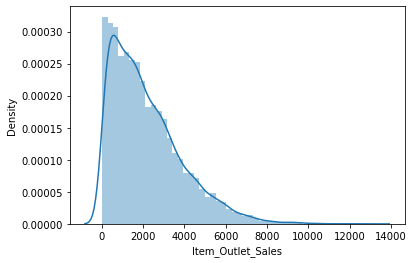

In [104]:
sns.distplot(result_train.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

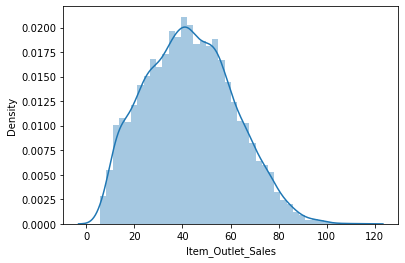

In [105]:
sns.distplot(np.sqrt(result_train.Item_Outlet_Sales))   

In [106]:
new_y_train=np.sqrt(result_train.Item_Outlet_Sales)

In [107]:
new_y_train.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: Item_Outlet_Sales, dtype: float64

In [108]:
print(scaled_x_train.shape,scaled_x_test.shape)    

(8523, 15) (5681, 15)


In [109]:
print(new_y_train.shape)

(8523,)


In [110]:
result_test.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,20.750,0.007565,107.8622,14,0,0,1,0,0,0,1,0,0,1,0
1,8.300,0.038428,87.3198,6,1,0,1,0,1,0,1,0,0,1,0
2,14.600,0.099575,241.7538,15,0,1,0,1,0,1,0,0,0,0,1
3,7.315,0.015388,155.0340,6,0,0,0,1,1,0,1,0,0,1,0
4,8.930,0.118599,234.2300,28,1,0,1,0,0,1,0,0,1,1,0


In [111]:
scaled_x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,1.695442,-1.285146,-0.532035,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-0.984502,-0.651927,-0.861920,-1.095190,1.354743,-0.480558,1.504748,-1.238991,1.435383,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
2,0.371614,0.602643,1.618094,-0.020085,-0.738147,2.080915,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,-1.598190,2.080915
3,-1.196530,-1.124629,0.225484,-1.095190,-0.738147,-0.480558,-0.664563,0.807109,1.435383,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,0.992970,1.497272,1.532846,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,-0.349551,2.848773,0.625708,-0.480558


Now we are Performing for the Entire train and test Data

In [112]:
print(scaled_x_train.shape,new_y_train.shape,scaled_x_test.shape)

(8523, 15) (8523,) (5681, 15)


In [113]:
model5.fit(scaled_x_train,new_y_train)
y_train_pred=model5.predict(scaled_x_train)
y_test_pred=model5.predict(scaled_x_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 92.25494333181753
RMSE_train = 9.604943692277303
r2_score_train = 0.7262749248957617


In [114]:
actual_test_pred=pd.DataFrame((y_test_pred)**2)
actual_test_pred.head(2)

,0
0,1529.073343
1,1258.907604


In [118]:
df_sample = pd.read_csv(r"C:\Users\abc\OneDrive\Documents\batch 24 from shan sir\Capstone Project New\Bigmart Sales Prediction using ML\sample_submission_8RXa3c6.csv")
df_name = pd.DataFrame(df_sample.values[:,:-1])
df_name.values


array([['FDW58', 'OUT049'],
       ['FDW14', 'OUT017'],
       ['NCN55', 'OUT010'],
       ...,
       ['NCO17', 'OUT045'],
       ['FDJ26', 'OUT017'],
       ['FDU37', 'OUT045']], dtype=object)

In [119]:
Test_predicted = pd.concat([df_name,actual_test_pred],axis=1 )
Test_predicted

,0,1,0
0,FDW58,OUT049,1529.073343
1,FDW14,OUT017,1258.907604
2,NCN55,OUT010,568.092398
3,FDQ58,OUT017,2205.798518
4,FDY38,OUT027,6021.406297
...,...,...,...
5676,FDB58,OUT046,2125.108798
5677,FDD47,OUT018,2326.879425
5678,NCO17,OUT045,1808.248817
5679,FDJ26,OUT017,3623.241976


In [120]:
Test_predicted.columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]

In [121]:
Test_predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1529.073343
1,FDW14,OUT017,1258.907604
2,NCN55,OUT010,568.092398
3,FDQ58,OUT017,2205.798518
4,FDY38,OUT027,6021.406297


In [122]:
Test_predicted.to_csv('final_predicted_data.csv',index = False)

Now Will perform is their any multicolinearity present in the data or not

By using VIF[Variance Inflation Factor]

In [123]:
scaled_x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769246,-1.111110,1.747454,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.496813,-1.044820,-1.489023,-1.334103,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,0.995858,-1.096486,0.010040,-0.139541,-0.738147,-0.480558,-0.664563,0.807109,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.361794,-0.087185,0.660050,-0.020085,1.354743,-0.480558,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,-0.087185,-1.399220,1.293934,-0.738147,2.080915,-0.664563,-1.238991,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif=pd.DataFrame()
data_vif['Feature']=scaled_x_train.columns

data_vif['VIF']=[variance_inflation_factor(scaled_x_train.values,i)  for i in range(len(scaled_x_train.columns))]
data_vif

,Feature,VIF
0,Item_Weight,1.006786
1,Item_Visibility,1.107456
2,Item_MRP,1.003568
3,age_of_store,9.041291
4,Item_Fat_Content_Regular,1.222731
5,Item_Fat_Content_others,inf
6,Outlet_Size_Medium,16.538765
7,Outlet_Size_Small,12.819369
8,Outlet_Location_Type_Tier 2,4.548076
9,Outlet_Location_Type_Tier 3,5.389807


In [125]:
X_train=scaled_x_train.copy(deep=True)
X_test=scaled_x_test.copy(deep=True)

In [126]:
X_train.drop(['Item_Fat_Content_others','New_Item_Identifier_NC'],axis=1,inplace=True)

In [127]:
X_test.drop(['Item_Fat_Content_others','New_Item_Identifier_NC'],axis=1,inplace=True)

In [128]:
model5.fit(X_train,new_y_train)
y_train_pred=model5.predict(X_train)
y_test_pred=model5.predict(X_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 92.32815161331952
RMSE_train = 9.608753905336505
r2_score_train = 0.7260577122280317


In [129]:
y_test_pred[:5]**2

array([1520.55348719, 1269.904234  ,  560.93831478, 2233.11030888,
       6018.21018783])

In [130]:
Rand = RandomForestRegressor(n_estimators = 500) 
random_forest = Rand.fit(X_train, new_y_train)

In [131]:
data = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': random_forest.feature_importances_*100}).\
                    sort_values('importance', ascending = False)

In [132]:
data

,feature,importance
2,Item_MRP,42.991486
9,Outlet_Type_Supermarket Type1,15.044729
1,Item_Visibility,9.487552
11,Outlet_Type_Supermarket Type3,8.762986
0,Item_Weight,7.223453
5,Outlet_Size_Medium,4.753003
10,Outlet_Type_Supermarket Type2,4.083837
3,age_of_store,3.535393
6,Outlet_Size_Small,1.874644
4,Item_Fat_Content_Regular,0.834255


In [133]:
# we can build the model by keeping only the important features which are contributing more to the target [Status]

important_features=data.feature[data['importance']>1].values
important_features

array(['Item_MRP', 'Outlet_Type_Supermarket Type1', 'Item_Visibility',
       'Outlet_Type_Supermarket Type3', 'Item_Weight',
       'Outlet_Size_Medium', 'Outlet_Type_Supermarket Type2',
       'age_of_store', 'Outlet_Size_Small'], dtype=object)

In [134]:
new_X_train=X_train[important_features]
new_X_test=X_test[important_features]


In [135]:
model5.fit(new_X_train,new_y_train)
y_train_pred=model5.predict(new_X_train)
y_test_pred=model5.predict(new_X_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 92.47379330708102
RMSE_train = 9.61632951323326
r2_score_train = 0.7256255859687397


Now will Perform Hyperparametertuning to imporve the accracy of the model 

In [136]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [137]:
grid_search.fit(new_X_train,new_y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [138]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [139]:
model6=RandomForestRegressor(bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=12,n_estimators=300)
model6.fit(new_X_train,new_y_train)
y_train_pred=model6.predict(new_X_train)
y_test_pred=model6.predict(new_X_test)
MSE_train= mean_squared_error(new_y_train,y_train_pred)
print('MSE_train =',MSE_train)
RMSE_train=np.sqrt(MSE_train)
print('RMSE_train =',RMSE_train)
r2_score_train=r2_score(new_y_train,y_train_pred)
print('r2_score_train =',r2_score_train)

MSE_train = 70.94764691643309
RMSE_train = 8.423042616325356
r2_score_train = 0.7894947492318076


In [140]:
y_test_pred[:4]**2

array([1608.64458364, 1229.57080795,  542.7164006 , 2062.06093958])

In [141]:
actual_test_pred=pd.DataFrame((y_test_pred)**2)
actual_test_pred.head(2)


,0
0,1608.644584
1,1229.570808


In [142]:
Test_predicted = pd.concat([df_name,actual_test_pred],axis=1 )
Test_predicted


,0,1,0
0,FDW58,OUT049,1608.644584
1,FDW14,OUT017,1229.570808
2,NCN55,OUT010,542.716401
3,FDQ58,OUT017,2062.060940
4,FDY38,OUT027,5662.717254
...,...,...,...
5676,FDB58,OUT046,1939.366518
5677,FDD47,OUT018,2319.440761
5678,NCO17,OUT045,1566.216208
5679,FDJ26,OUT017,3423.020502


In [143]:
Test_predicted.columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]


In [144]:
Test_predicted.to_csv('new_final_predicted_data.csv',index = False)


Now will perform PCA

we want to perform from here if we want to improvise our model till now i got 78.94% accuracy after performing hyperparameter tuning and we have selected only few features to build the model to over come curse of dimentionality 

In [145]:
# Performing the pca
from sklearn.preprocessing import StandardScaler

In [146]:
sc=StandardScaler()

sc_x=sc.fit_transform(new_X)

scaled_x=pd.DataFrame(sc_x,columns=new_X.columns)
scaled_x.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769246,-1.111110,1.747454,-0.139541,-0.738147,-0.480558,1.504748,-1.238991,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.496813,-1.044820,-1.489023,-1.334103,1.354743,-0.480558,1.504748,-1.238991,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,0.995858,-1.096486,0.010040,-0.139541,-0.738147,-0.480558,-0.664563,0.807109,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.361794,-0.087185,0.660050,-0.020085,1.354743,-0.480558,-0.664563,0.807109,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.848890,-0.087185,-1.399220,1.293934,-0.738147,2.080915,-0.664563,-1.238991,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


In [147]:
from sklearn.decomposition import PCA

pca_bc = PCA(.95, random_state = 100)
pca_data = pca_bc.fit_transform(scaled_x)

In [148]:
df_bc_subset = pd.DataFrame(pca_data, columns= ['PC' + str(i+1) for i in range(10)])
df_bc_subset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.546625,-0.595849,0.451533,-1.750504,0.632935,1.751624,-0.766924,-0.905633,1.468363,-0.815873
1,2.725948,-0.121171,3.264666,-0.142549,-2.149606,0.042695,1.226648,-0.315540,-0.759888,-0.169435
2,-1.177754,-0.512986,-0.253404,-0.831778,0.703973,-0.767666,-0.748790,-1.126242,-0.316998,-0.815964
3,0.505607,-1.224572,-0.338232,0.836059,1.594382,-0.606367,0.968994,-0.258982,-1.680970,-0.034292
4,0.792624,3.384604,-1.080133,0.183364,-1.577650,-0.230825,0.786723,-1.484477,0.389782,1.368417


In [149]:
X=df_bc_subset
y=y

In [150]:
# will split the data into train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [151]:
X_train.shape

(6818, 10)

In [152]:
model6=RandomForestRegressor(criterion='squared_error',max_depth=8,max_features='auto',n_estimators=500)


model6.fit(X_train,y_train)
y_train_pred=model6.predict(X_train)
y_test_pred=model6.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

KeyboardInterrupt: 

In [ ]:
import xgboost as xgb
model7 = xgb.XGBRegressor()


model7.fit(X_train,y_train)
y_train_pred=model7.predict(X_train)
y_test_pred=model7.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gbm_param_grid = {
    'n_estimators': [25,50],
    'max_depth': range(2, 12),
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7]
}

gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='neg_mean_squared_error', n_iter=5,cv=4,verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))


In [ ]:
model8= xgb.XGBRegressor(n_estimators=25, max_depth= 6, colsample_bytree= 0.5)
model8.fit(X_train,y_train)
y_train_pred=model8.predict(X_train)
y_test_pred=model8.predict(X_test)
MSE_train= mean_squared_error(y_train,y_train_pred)
MSE_test= mean_squared_error(y_test,y_test_pred)
print('MSE_train =',MSE_train)
print('MSE_test =',MSE_test)
RMSE_train=np.sqrt(MSE_train)
RMSE_test=np.sqrt(MSE_test)
print('RMSE_train =',RMSE_train)
print('RMSE_test =',RMSE_test)
r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

In [ ]:
# no need to use this technique here just for rough use we have written below code for reference purpose

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR


In [ ]:
algos = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor(),xgb.XGBRegressor(),SVR()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K Neighbors Regression', 'Decision Tree Regression','RandomForestRegressor','XGBoost','SVR']
rmse_list = []
r2_s = []
r2_t=[]

In [ ]:
from sklearn import metrics

for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_train = r2_score(y_train,y_train_pred)
    r2_t.append(r2_train)
    r2 = r2_score(y_test,y_pred)
    r2_s.append(r2)

In [ ]:
evaluation = pd.DataFrame({'Model': names, 'RMSE': rmse_list,'r2_Score Train':r2_t, 'r2_Score': r2_s,})

In [ ]:
evaluation